<a href="https://colab.research.google.com/github/Bhagyasri00/Digit_Classification/blob/main/mnist_Inference_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/mnist_test_Dataset.csv')

In [ ]:
X_test = df.iloc[:, 1:].values
y_test = df.iloc[:, 0].values

Reshaping and Normalising Data

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 28,28 , 1 ).astype('float32') /255

In [ ]:
print("NaNs in X_test:", np.isnan(X_test).any())
print("Infs in X_test:", np.isinf(X_test).any())

NaNs in X_test: False
Infs in X_test: False


converting to categorical

In [ ]:
y_test= to_categorical(y_test)

In [ ]:
model = load_model("/content/mnist_model.h5")

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 30.6644 - accuracy: 0.9182
Test Loss: 30.664396286010742
Test Accuracy: 0.9182000160217285


In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

313/313 [==============================] - 3s 11ms/step


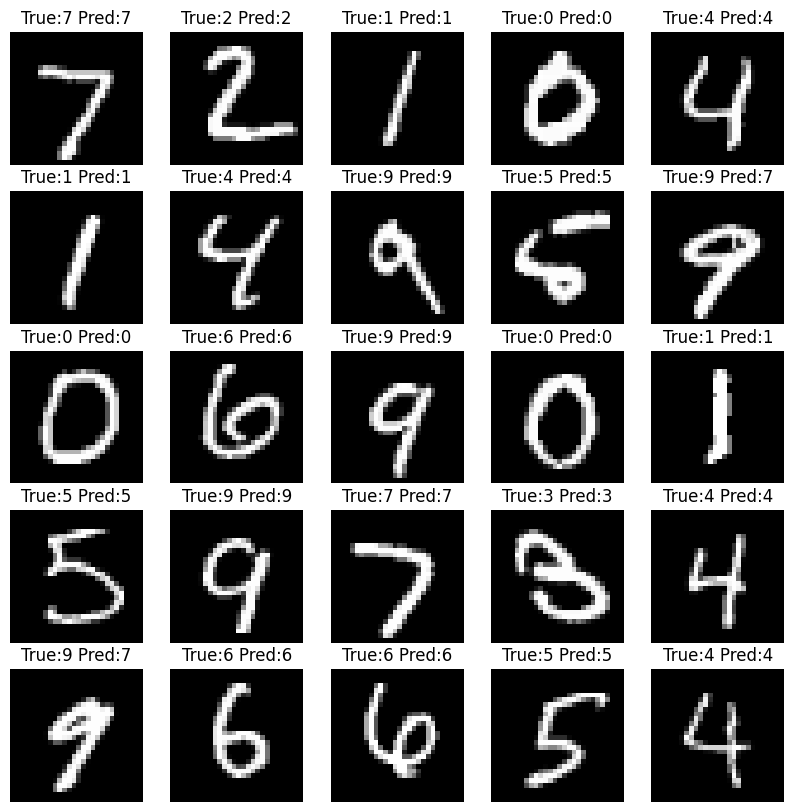

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True:{true_labels[i]} Pred:{predicted_labels[i]}")
    plt.axis('off')
    plt.savefig('plot.png')
plt.show()